Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 140MB/s]


     출판사  발행년도  대출건수
0    민음사  2021     0
4    김영사  2021     0
23  문학동네  2021     0
24   한길사  2021     0
39   현암사  2021     0
          대출건수
출판사 발행년도      
博英社 1947     0
    1975     0
    1977     0
    1986     1
    1987     1
   출판사  발행년도  대출건수
0  博英社  1947     0
1  博英社  1975     0
2  博英社  1977     0
3  博英社  1986     1
4  博英社  1987     1


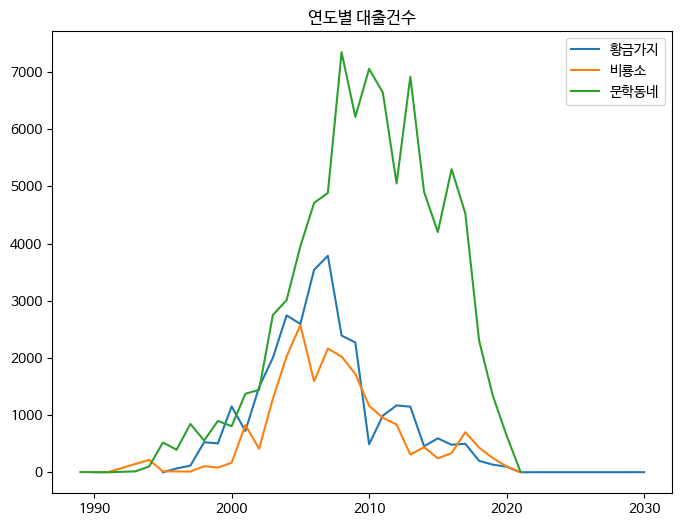

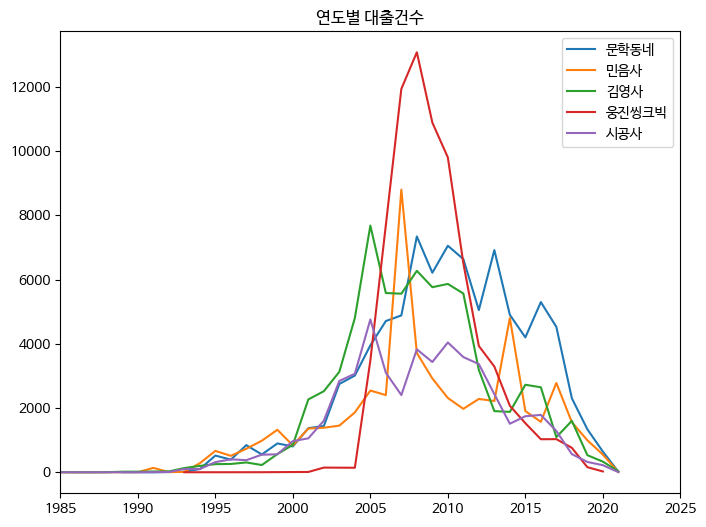

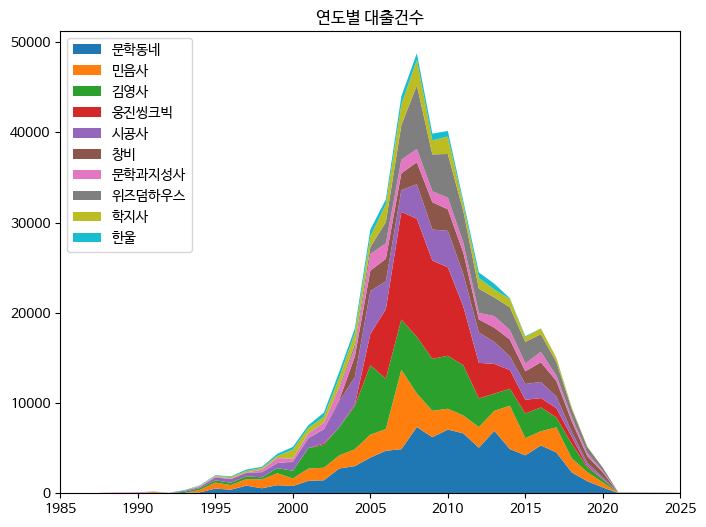

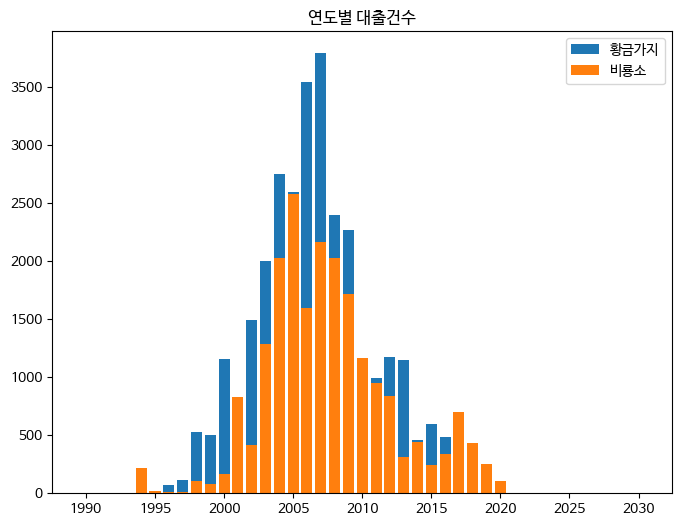

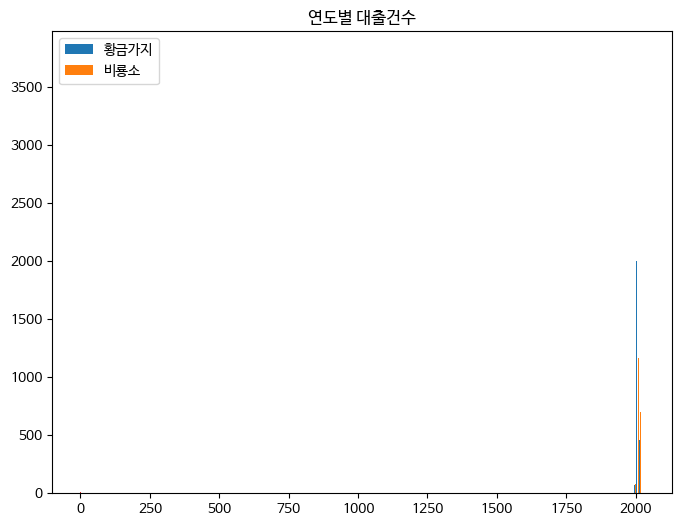

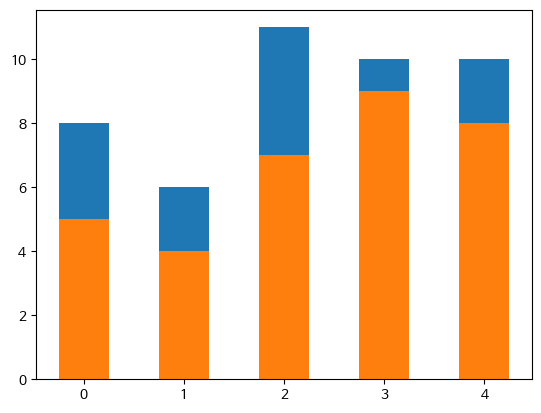

         대출건수                                                       
발행년도     2013    2014    2015    2016    2017    2018    2019   2020
출판사                                                                 
문학동네   6919.0  4904.0  4201.0  5301.0  4529.0  2306.0  1340.0  645.0
민음사    2219.0  4805.0  1907.0  1571.0  2782.0  1559.0   998.0  552.0
김영사    1905.0  1881.0  2726.0  2647.0  1094.0  1602.0   533.0  332.0
웅진씽크빅  3293.0  2072.0  1529.0  1029.0  1032.0   762.0   159.0   26.0
시공사    2433.0  1512.0  1745.0  1787.0  1287.0   566.0   322.0  221.0
          대출건수                                                            
발행년도      2013     2014     2015     2016     2017    2018    2019    2020
출판사                                                                       
문학동네    6919.0   4904.0   4201.0   5301.0   4529.0  2306.0  1340.0   645.0
민음사     9138.0   9709.0   6108.0   6872.0   7311.0  3865.0  2338.0  1197.0
김영사    11043.0  11590.0   8834.0   9519.0   8405.0  5467.0  2871.0  1529.

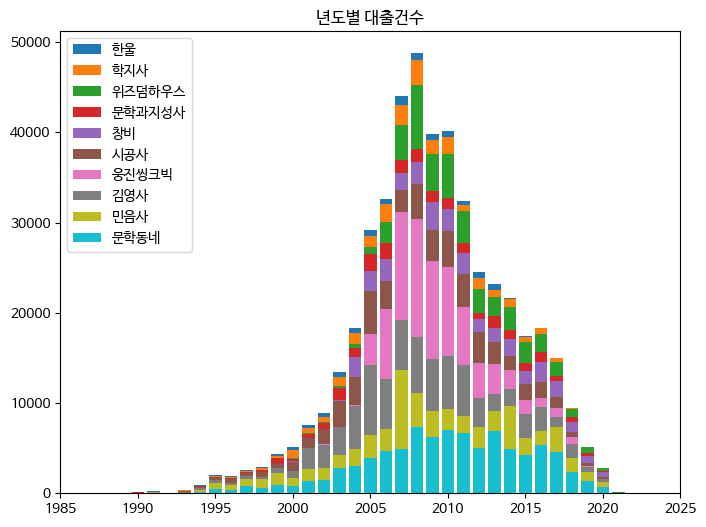

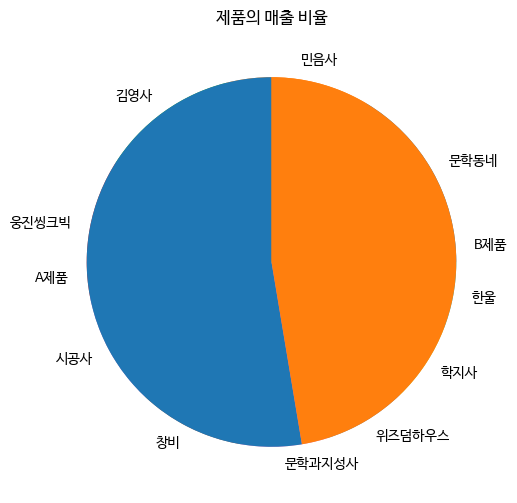

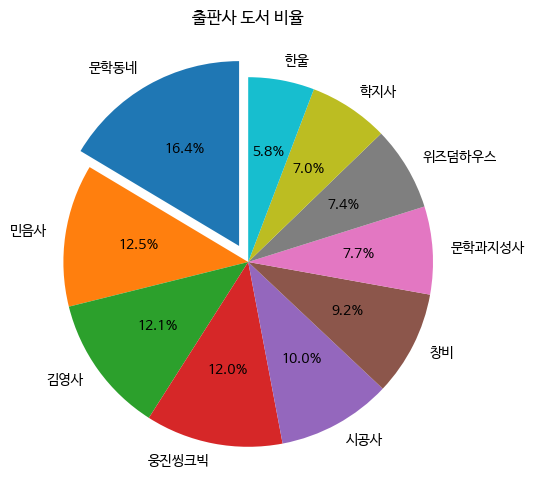

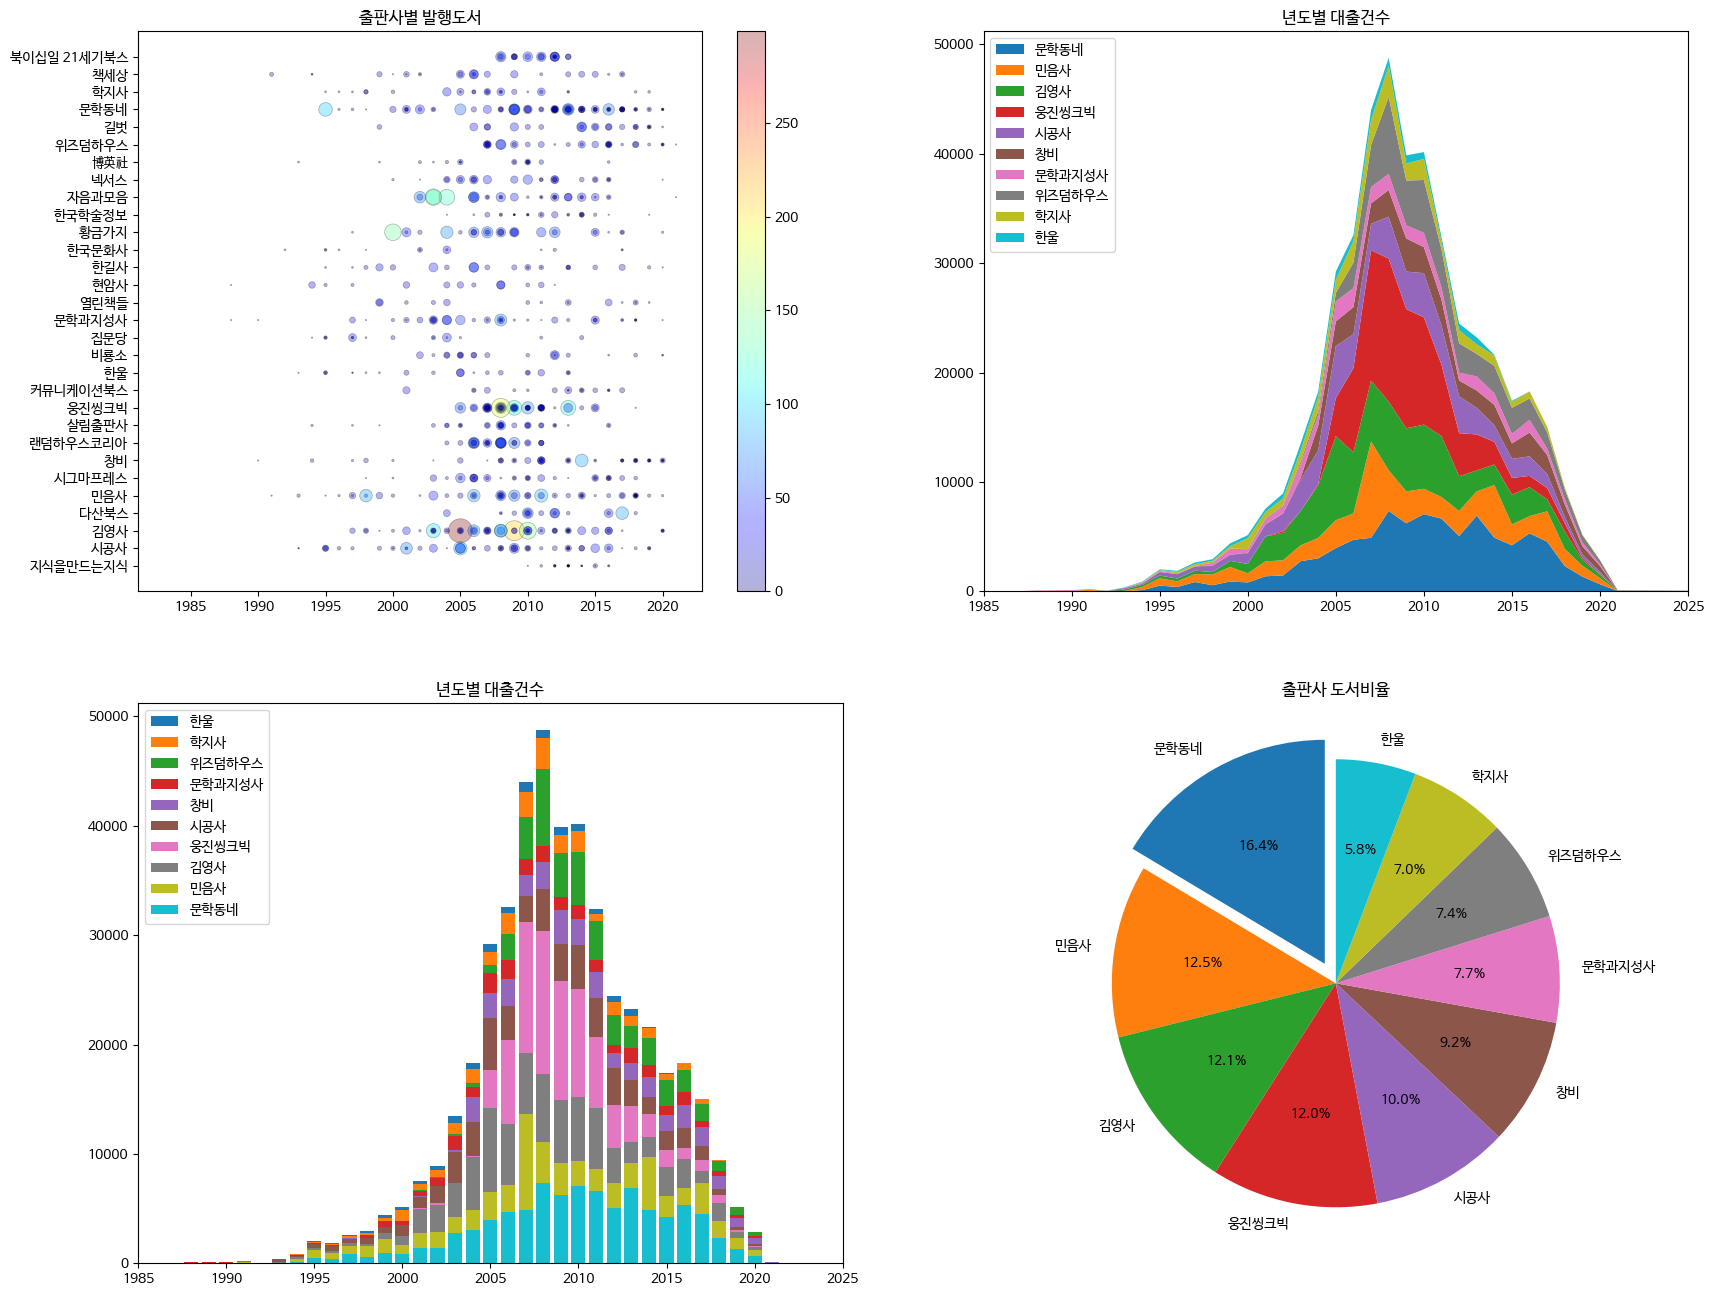

In [ ]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import sys
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

import matplotlib.pyplot as plt

# 나눔바른고딕 폰트로 설정합니다.
plt.rc('font', family='NanumBarunGothic')
# 그래프 DPI 기본값을 변경합니다.
plt.rcParams['figure.dpi'] = 100
import gdown
gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

import pandas as pd
ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

# 하나의 피겨에 여러 선 그래프 그리기 : 그냥 plot()을 여러번 호출하면 된다.
top30_pubs = ns_book7['출판사'].value_counts()[:30]
top30_pubs_idx = ns_book7['출판사'].isin(top30_pubs.index)

ns_book9 = ns_book7[top30_pubs_idx][['출판사','발행년도','대출건수']] # top30에 해당하는 행의 출판사,발행년도,대출건수 출력
print(ns_book9.head())

ns_book9 = ns_book9.groupby(by=['출판사','발행년도']).sum() # 출판사, 발행년도로 그룹으로 만들어 똑같은 것은 개수를 합친다.
print(ns_book9.head())

ns_book9 = ns_book9.reset_index() # 인덱스 초기화
print(ns_book9.head())

ns_book9[ns_book9['출판사']=='황금가지'].head()

# 여러 선 그리기
line1 = ns_book9[ns_book9['출판사']=='황금가지'] # 출판사가 황금가지인 행들만 모음
line2 = ns_book9[ns_book9['출판사']=='비룡소']
line3 = ns_book9[ns_book9['출판사']=='문학동네']
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(line1['발행년도'], line1['대출건수'], label='황금가지') # plot(x좌표,y좌표,범례에 추가할 이름)
ax.plot(line2['발행년도'], line2['대출건수'], label='비룡소')
ax.plot(line3['발행년도'], line3['대출건수'], label='문학동네')
ax.set_title('연도별 대출건수')
ax.legend() # 범례(뭐가 뭔지 알려주는 것)를 추가함.
fig.show()

# 선 5개 그리기 x축 = 발행년도, y축 = 대출건수
fig, ax = plt.subplots(figsize=(8,6))
for pub in top30_pubs.index[:5]: # 상위 5개 얻어옴.
  line = ns_book9[ns_book9['출판사']==pub] # 상위 5개 출판사 중 해당 반복문의 변수에 대한 것만 선택
  ax.plot(line['발행년도'], line['대출건수'], label=pub) # 5개 출판사에 대해선 그래프 그리고 범례 표시
ax.set_title('연도별 대출건수')
ax.legend()
ax.set_xlim(1985,2025) # x축 범위 설정, y축은 set_ylim()이다.
# plt.axis([1985,2025,0,13000]) # [x축 시작, x축 끝, y축 시작, y축 끝]이다.
fig.show()

# 스택 영역 그래프 : 하나의 선 그래프 위에 다른 선 그래프를 차례대로 쌓는 것, 그래프 사이의 간격이 y축의 값이 된다. 1차원 + 2차원 행렬
ns_book10 = ns_book9.pivot_table(index='출판사',columns='발행년도') # 열을 2차원 테이블로 바꿈. 행 = A출판사,B출판사... 열 = 년도
ns_book10.columns[:10] # 열 출력, but 1947이 아닌 ('대출건수',1947) 형태로 되어있다.
# 발행년도 열을 리스트로 바꾸기
top10_pubs = top30_pubs.index[:10] # 최상위 10개 판매 출판사 (판매년도,판매횟수)로 구성되어있음
year_cols = ns_book10.columns.get_level_values(1) # ('대출건수',1947) 중에 2번째 (1인덱스)만 가져온다.
# stackplot()으로 스택 영역 그래프 그리기
fig, ax = plt.subplots(figsize=(8,6))
ax.stackplot(year_cols,ns_book10.loc[top10_pubs].fillna(0), labels=top10_pubs) # nan인건 0으로 채움.
ax.set_title('연도별 대출건수')
ax.legend(loc='upper left') # 범례를 왼쪽 상단에 위치
ax.set_xlim(1985,2025)
fig.show()

# 하나의 피겨에 여러 막대 그래프 그리기 : bar() 여러번 호출
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(line1['발행년도'],line1['대출건수'],label='황금가지')
ax.bar(line2['발행년도'],line2['대출건수'],label='비룡소')
ax.set_title(f'연도별 대출건수')
ax.legend()
fig.show()

# 막대를 여러개 그리면 겹쳐서 보이니 기존 너비인 0.8을 둘이서 나눠서 0.4씩 가지게 한다.
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(line1['발행년도']-0.2,line1['대출건수'],width=0.4,label='황금가지') # width로 막대너비 지정
ax.bar(line2['발행년도']+0.2,line2['대출건수'],width=0.4,label='비룡소')
ax.set_title(f'연도별 대출건수')
ax.legend()
fig.show()

# 스택 막대 그래프 : 옆에 안두고 스택처럼 위로 쌓을 수도 있음
height1=[5,4,7,9,8]
height2=[3,2,4,1,2]
plt.bar(range(5),height1,width=0.5)
plt.bar(range(5),height2,bottom=height1,width=0.5) # bottom = height1 : height1이 끝나는 위치에서 시작함
plt.show()

height3 = [a + b for a, b in zip(height1,height2)] # 위의 결과와 같음.
plt.bar(range(5),height3,width=0.5) # 더한 값을 위에 넣고
plt.bar(range(5),height1,width=0.5) # 그냥 값을 덮어쓰는 것일 뿐임
plt.show()

# 데이터 값 누적하여 그리기
print(ns_book10.loc[top10_pubs[:5], ('대출건수',2013):('대출건수',2020)])
print(ns_book10.loc[top10_pubs[:5], ('대출건수',2013):('대출건수',2020)].cumsum()) # cumsum()은 행과 열이 있을 때 누적합처럼 계속 밑으로 더해나가면서 막대 그래프를 그릴 수 있게 한다.

ns_book12 = ns_book10.loc[top10_pubs].cumsum()

fig, ax = plt.subplots(figsize=(8, 6))
for i in reversed(range(len(ns_book12))): # 가장 큰 막대부터 그려야하므로 누적 합계가 가장 큰 마지막 출판사부터 그린다.
    bar = ns_book12.iloc[i]     # 행 추출 iloc[] = 특정 행 추출
    label = ns_book12.index[i]  # 출판사 이름 추출
    ax.bar(year_cols, bar, label=label)
ax.set_title('년도별 대출건수')
ax.legend(loc='upper left')
ax.set_xlim(1985, 2025)
fig.show()

# 원 그래프 그리기
data = top30_pubs[:10] # 도서 개수 데이터
labels = top30_pubs.index[:10] # 도서 출판사 데이터
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(data,labels=labels) # pie(값,인덱스)로 원 그래프 그린다. 3시방향부터 반시계방향으로 이루어짐
ax.set_title('출판사 도서 비율')
fig.show()

plt.pie([10,9],labels=['A제품','B제품'],startangle=90) # startangle 매개변수로 3시방향에서 시작하는 것이 아닌 다른 시각에서 시작할 수 있다. 90은 12시이다.
plt.title('제품의 매출 비율')
plt.show()

# 비율 표시하고 부채꼴 강조하기
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(data,labels=labels,startangle=90,autopct='%.1f%%', explode=[0.1]+[0]*9) # 12시 방향부터 autopct러 소수점 1자리까지만 표시, eplode매개변수는 그래프로부터 조각을 떨어뜨리게 한다.
ax.set_title('출판사 도서 비율')
fig.show()

# 여러개 그래프 그리기
fig, axes = plt.subplots(2, 2, figsize=(20, 16)) # 2개행, 2개열

# 산점도
ns_book8 = ns_book7[top30_pubs_idx].sample(1000, random_state=42)
sc = axes[0, 0].scatter(ns_book8['발행년도'], ns_book8['출판사'],
                        linewidths=0.5, edgecolors='k', alpha=0.3,
                        s=ns_book8['대출건수'], c=ns_book8['대출건수'], cmap='jet')
axes[0, 0].set_title('출판사별 발행도서')
fig.colorbar(sc, ax=axes[0, 0])

# 스택 선 그래프
axes[0, 1].stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0),
                     labels=top10_pubs)
axes[0, 1].set_title('년도별 대출건수')
axes[0, 1].legend(loc='upper left')
axes[0, 1].set_xlim(1985, 2025)

# 스택 막대 그래프
for i in reversed(range(len(ns_book12))):
    bar = ns_book12.iloc[i]     # 행 추출
    label = ns_book12.index[i]  # 출판사 이름 추출
    axes[1, 0].bar(year_cols, bar, label=label)
axes[1, 0].set_title('년도별 대출건수')
axes[1, 0].legend(loc='upper left')
axes[1, 0].set_xlim(1985, 2025)

# 원 그래프
axes[1, 1].pie(data, labels=labels, startangle=90,
               autopct='%.1f%%', explode=[0.1]+[0]*9)
axes[1, 1].set_title('출판사 도서비율')

fig.savefig('all_in_one.png')
fig.show()

# 판다스로 여러 그래프 그리기
# 스택 영역 그래프 그리기 : plot.area()
ns_book11 = ns_book9.pivot_table(index='발행년도', columns='출판사', values='대출건수')
ns_book11.loc[2000:2005]

import numpy as np

ns_book11 = ns_book7[top30_pubs_idx].pivot_table(
    index='발행년도', columns='출판사',
    values='대출건수', aggfunc=np.sum) # values 매개변수가 있으므로 열 이름이 다단으로 구성되지 않는다. get_level_values를 안 써도 됨.
print(ns_book11.loc[2000:2005]) # 피벗 테이블중 2000~2005년만 확인

fig, ax = plt.subplots(figsize=(8, 6))
ns_book11[top10_pubs].plot.area(ax=ax, title='년도별 대출건수',
                                xlim=(1985, 2025)) # ax 매개변수에 fig, ax 중 ax 객체를 전달해야함
ax.legend(loc='upper left') # 범례 왼쪽 위
fig.show()

# 스택 막대 그래프 그리기 : plot.bar(), stacked=True (스택 막대 그래프 매개변수)
fig, ax = plt.subplots(figsize=(8, 6))
ns_book11.loc[1985:2025, top10_pubs].plot.bar( # loc[가로,세로] / 맷플롯립은 bar(가로,세로) 였음.
    ax=ax, title='년도별 대출건수', stacked=True, width=0.8)
ax.legend(loc='upper left')
fig.show()